## MLSC - Classification Excercise

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <br><b>MLSC-Project 2</b></br>
                    <br><b>1.V S SHABARISH</b></br>
                    <br><b>2.SANDEEP RAM</b></br>
                    <br><b>3.MAGESH KUMAR B</b></br>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context 

**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

# Table of Content

1. Data Preprocessing - **3 Marks**
2. Logistic Regression Model - **3 Marks**
3. Decision Tree Model - **3 Marks**
4. Random Forest Model - **3 Marks**
5. XGBoost Model - **3 Marks**
6. K Nearest Neighbors Model - **3 Marks**
7. Naive Bayes Model - **3 Marks**
8. Compare the Results of all the above mentioned algorithms - **4 Marks**
9. Intrepret your solution based on the results - **5 Marks**


<a id="logreg"> </a>
## 1. Data Pre-Processing

**Import the required libraries**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import log_loss


from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
#import xgboost as xgb
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


from sklearn import metrics
from sklearn.utils import resample
from sklearn import preprocessing
import statsmodels.api as sm


# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

import warnings
warnings.filterwarnings("ignore")

#### Load the csv file

In [7]:
df=pd.read_csv("bank.csv")

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
df.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   32       205         2    999         0           1.1          93.994   
1   32       691        10    999         0           1.4          93.918   
2   45        45         8    999         0           1.4          93.444   
3   33       400         1      5         2          -1.1          94.601   
4   47       903         2    999         1          -1.8          93.075   

   cons.conf.idx  euribor3m  nr.employed    y  
0          -36.4      4.858       5191.0   no  
1          -42.7      4.960       5228.1  yes  
2          -36.1      4.963       5228.1   no  
3          -49.5      1.032       4963.6  yes  
4          -47.1      1.415       5099.1  yes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


In [10]:
df["y"].value_counts()

no     5000
yes    4640
Name: y, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are no null values in the bank data.Therefore we proceed with further Exploratory data analysis</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the outliers (if any) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

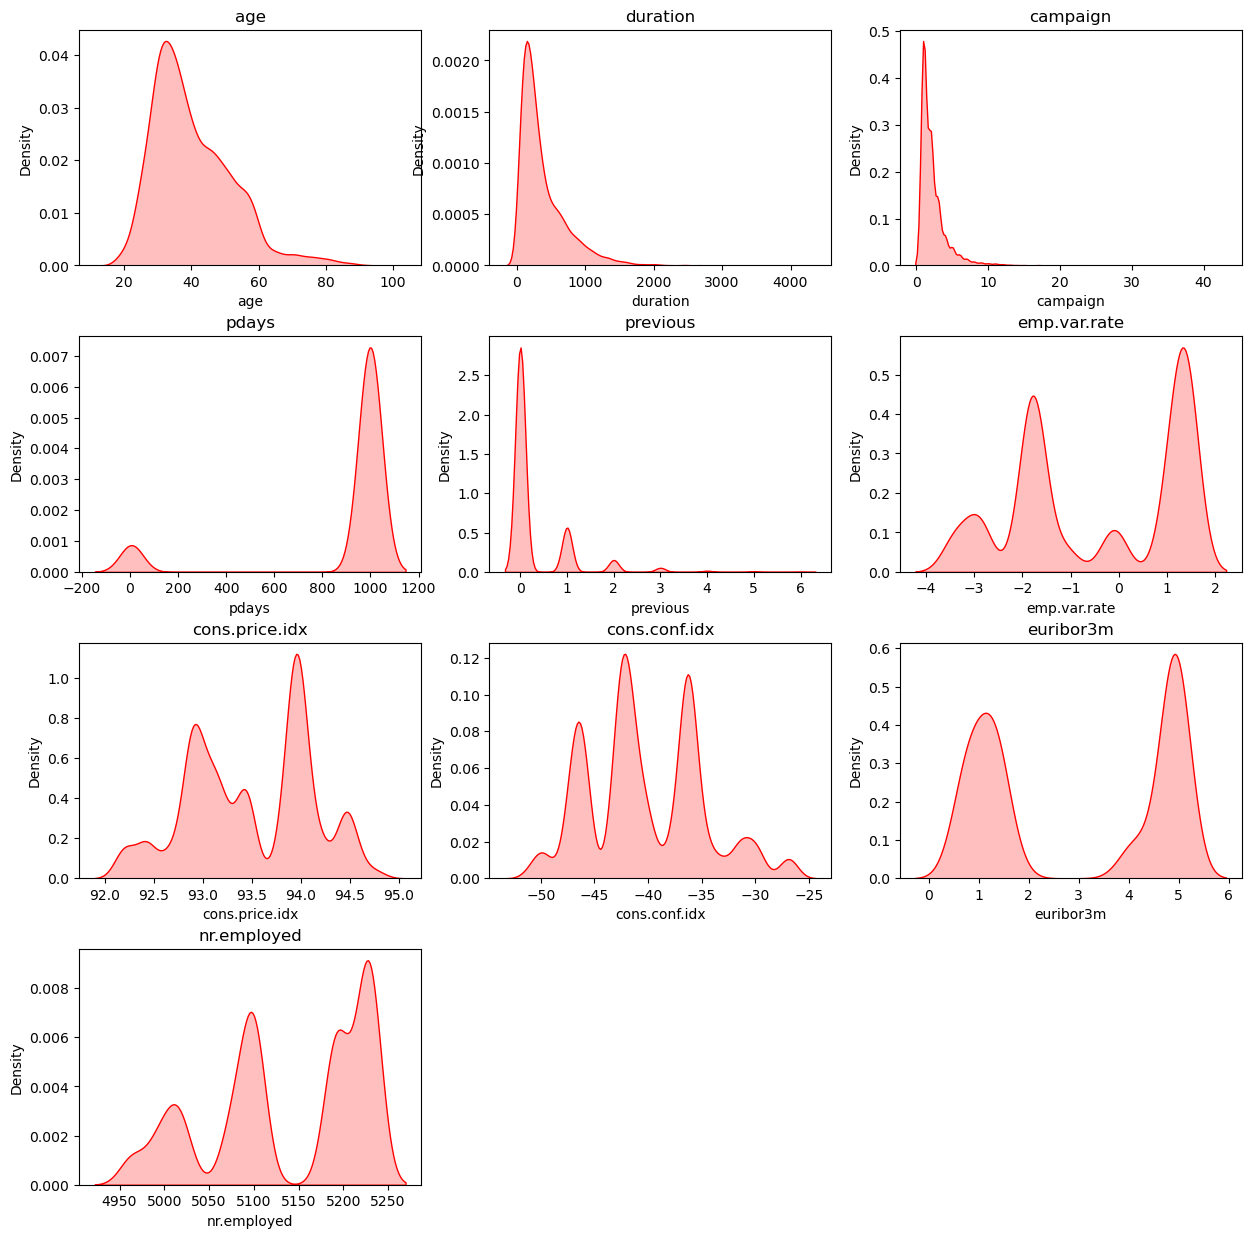

In [13]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace =0.2, hspace = 0.3)
for i in range(0,len(df.columns)-1):
    plt.subplot(4,3,i+1)
    sns.kdeplot(df[df.columns[i]],color="r",fill="lb")
    plt.title(df.columns[i])
plt.show()

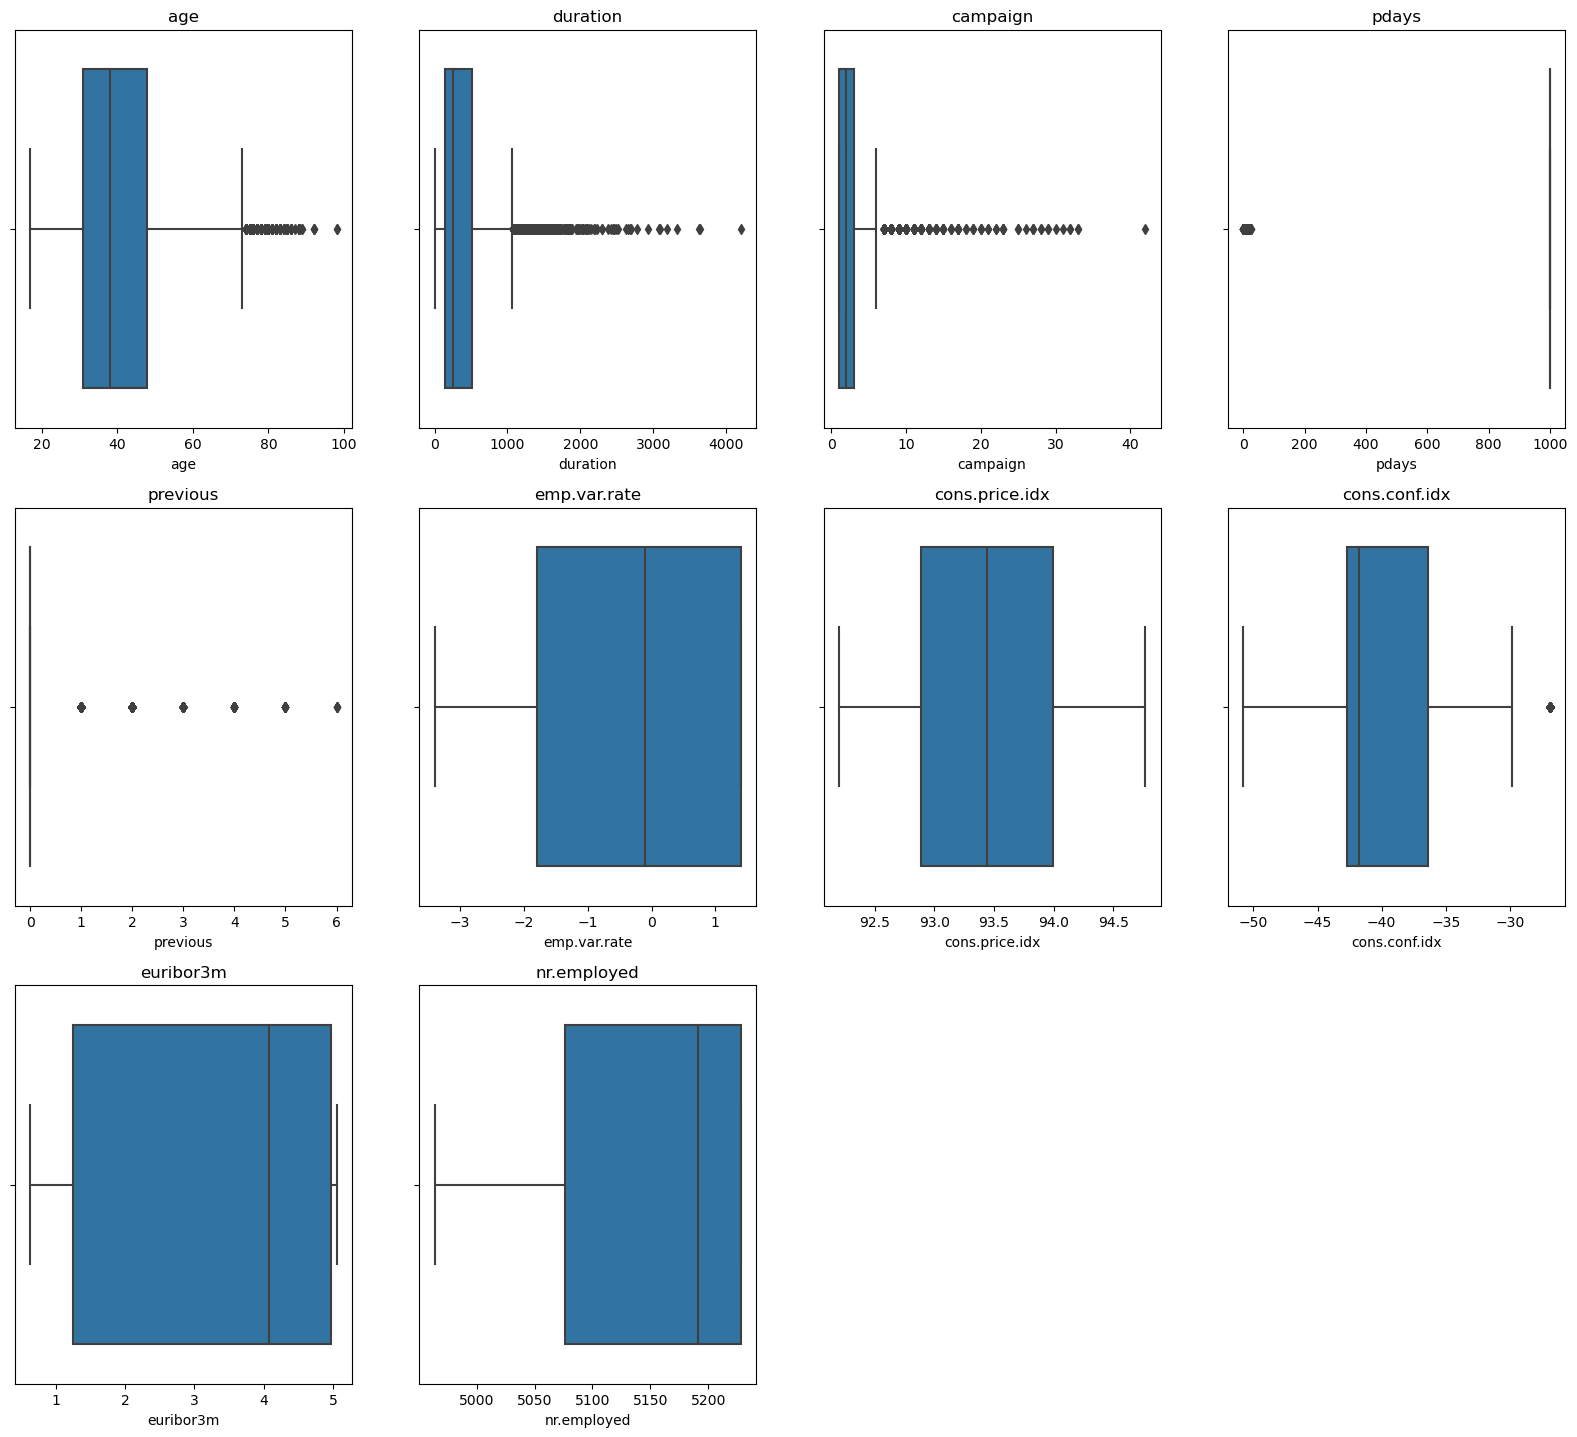

In [14]:
fig = plt.figure(figsize=(20,30))
i=1

for variable in df.select_dtypes(exclude="object").columns:
                     plt.subplot(5,4,i)
                     sns.boxplot(df[variable])
                     plt.title(variable)
                     i = i+1
    
plt.show()

<font color = blue>
Outliers are observed in following features
    <br> 1. Age
    <br> 2. duration
    <br> 3. campaign 
    <br> 4. pdays
    <br> 5. previous
    <br> 6. cons.conf.idx

In [15]:
df.describe()

age     duration     campaign        pdays     previous  \
count  9640.000000  9640.000000  9640.000000  9640.000000  9640.000000   
mean     40.286618   379.564004     2.349170   893.100519     0.306120   
std      11.901274   354.768370     2.384519   306.531615     0.684605   
min      17.000000     0.000000     1.000000     0.000000     0.000000   
25%      31.000000   141.000000     1.000000   999.000000     0.000000   
50%      38.000000   260.000000     2.000000   999.000000     0.000000   
75%      48.000000   512.000000     3.000000   999.000000     0.000000   
max      98.000000  4199.000000    42.000000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   9640.000000     9640.000000    9640.000000  9640.000000  9640.000000  
mean      -0.460218       93.485750     -40.265373     3.003616  5137.407147  
std        1.717852        0.631366       5.322795     1.886179    86.347481  
min       -3.400000       92.201000     -50.800000     0.634000  4963.600000  
25%       -1.800000       92.893000     -42.700000     1.250000  5076.200000  
50%       -0.100000       93.444000     -41.800000     4.076000  5191.000000  
75%        1.400000       93.994000     -36.400000     4.959000  5228.100000  
max        1.400000       94.767000     -26.900000     5.045000  5228.100000

<font color = blue>
Though box plot is representing as Outliers.
   <br> the values are not considered as outliers For the following features for the below reasons. 
    <br><b>1. Age (years):</b> min - 17 and max 98 are realistic values,
    <br><b>2. campaign (days):</b> min 1 day and max 24 days; Acceptable range, 
    <br><b>3. previous: </b> Max 6 - logical number

### Outlier treatment of "duration" and "cons.conf.idx"

In [16]:
IQR = df["duration"].quantile(0.75)- df["duration"].quantile(0.25)
Limit = IQR*1.5
filter = df["duration"]<Limit
df["duration"].where(filter,other=Limit,inplace=True)

In [17]:
df["cons.conf.idx"]=abs(df["cons.conf.idx"])

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <br>Consumer confidence index is generally reported as a positive number
<br> It is a measure that reflects the degree of doom and gloom
that consumer have regarding the overall state of the economy.
                </font>
            </div>
        </td>
    </tr>
</table>
<font color = blue>


In [18]:
Limit = df["cons.conf.idx"].quantile(0.0)
filter = df["cons.conf.idx"]>Limit
df["cons.conf.idx"].where(filter,other=Limit,inplace=True)

### Outlier treatment of "pdays"

In [20]:
df["pdays"].value_counts()

999    8612
3       311
6       304
4        70
7        42
2        39
9        38
10       32
5        30
13       30
12       29
15       17
11       16
8        14
14       12
0        11
1        11
16        7
18        4
19        2
22        2
21        2
17        2
26        1
25        1
27        1
Name: pdays, dtype: int64

<font color = blue>
Number of days that passed by after the client was last contacted from a previous campaign 
<br> Max value 999 means client was not previously contacted
<br> We can replace by null values or maximum number.

In [21]:
df[df["pdays"] == 999]["y"].value_counts()

no     4939
yes    3673
Name: y, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <br>
Since we can see that the total values with 999 in pdays column exceed more than 80% of the dataset which means replacing 80% of data with null value.Hence we remove the pdays column</br>
                </font>
            </div>
        </td>
    </tr>
</table>
<font color = blue>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
x=df.drop("y", axis=1)
y=df["y"]

In [23]:
y.replace({"no":1, "yes":0}, inplace=True)

In [24]:
x.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   32     205.0         2    999         0           1.1          93.994   
1   32     556.5        10    999         0           1.4          93.918   
2   45      45.0         8    999         0           1.4          93.444   
3   33     400.0         1      5         2          -1.1          94.601   
4   47     556.5         2    999         1          -1.8          93.075   

   cons.conf.idx  euribor3m  nr.employed  
0           36.4      4.858       5191.0  
1           42.7      4.960       5228.1  
2           36.1      4.963       5228.1  
3           49.5      1.032       4963.6  
4           47.1      1.415       5099.1

In [25]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: y, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the unnecessary variables that will not contribute to the model. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

We can drop the field - pdays as there are 8612 instances of pdays (Number of days that passed by after the client was last contacted from a previous campaign) where the client was not contacted. So, its not add any much value.

In [26]:
x.drop("pdays",axis=1,inplace=True)

In [27]:
x.head()

age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0   32     205.0         2         0           1.1          93.994   
1   32     556.5        10         0           1.4          93.918   
2   45      45.0         8         0           1.4          93.444   
3   33     400.0         1         2          -1.1          94.601   
4   47     556.5         2         1          -1.8          93.075   

   cons.conf.idx  euribor3m  nr.employed  
0           36.4      4.858       5191.0  
1           42.7      4.960       5228.1  
2           36.1      4.963       5228.1  
3           49.5      1.032       4963.6  
4           47.1      1.415       5099.1

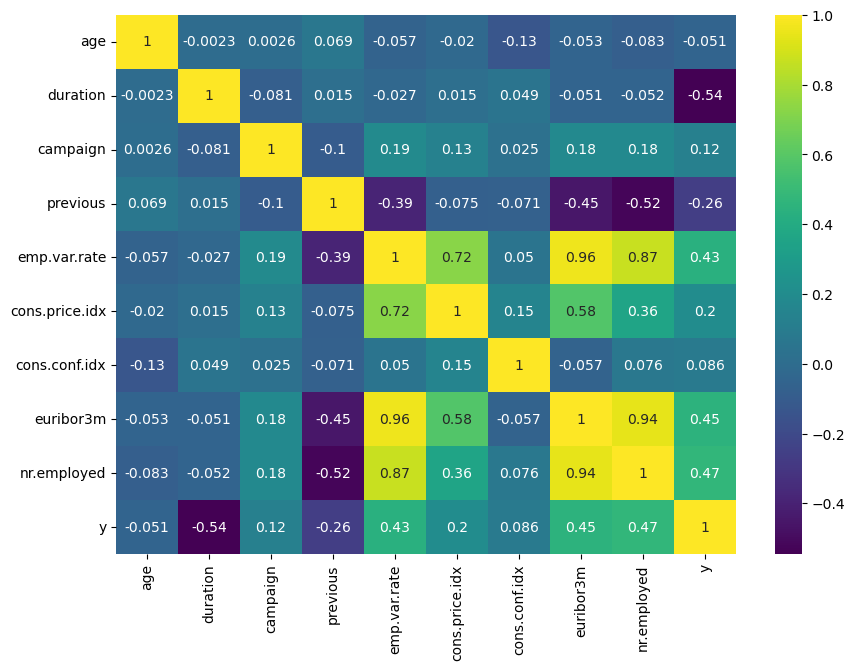

In [28]:
fig = plt.figure(figsize=(10,7))
sns.heatmap(df.drop("pdays",axis=1).corr(),annot=True, cmap="viridis")
plt.show()

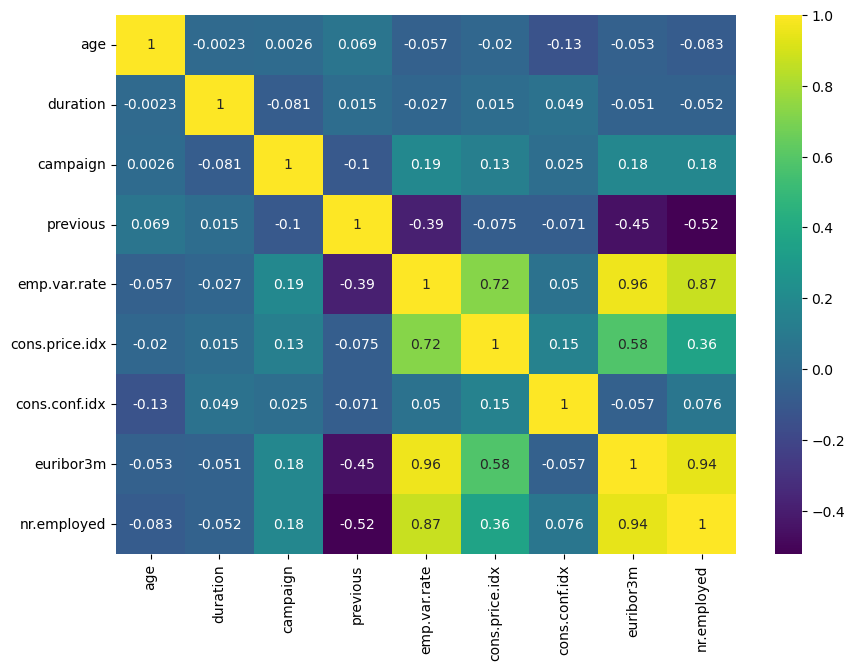

In [29]:
fig = plt.figure(figsize=(10,7))
x_data_corr = x.corr()
sns.heatmap(x_data_corr,annot=True, cmap="viridis")
plt.show()

From the above correltion plot, we can see the below pairs are highly correlated,
<br>emp.var.rate and cons.price.idx = 0.72
<br>emp.var.rate and euribor3m = 0.96
<br>emp.var.rate and nr.employed = 0.87
<br>nr.employed and euribor3m = 0.94

In [30]:
x.drop("emp.var.rate",axis=1,inplace=True)

In [32]:
x.drop("euribor3m",axis=1,inplace=True)

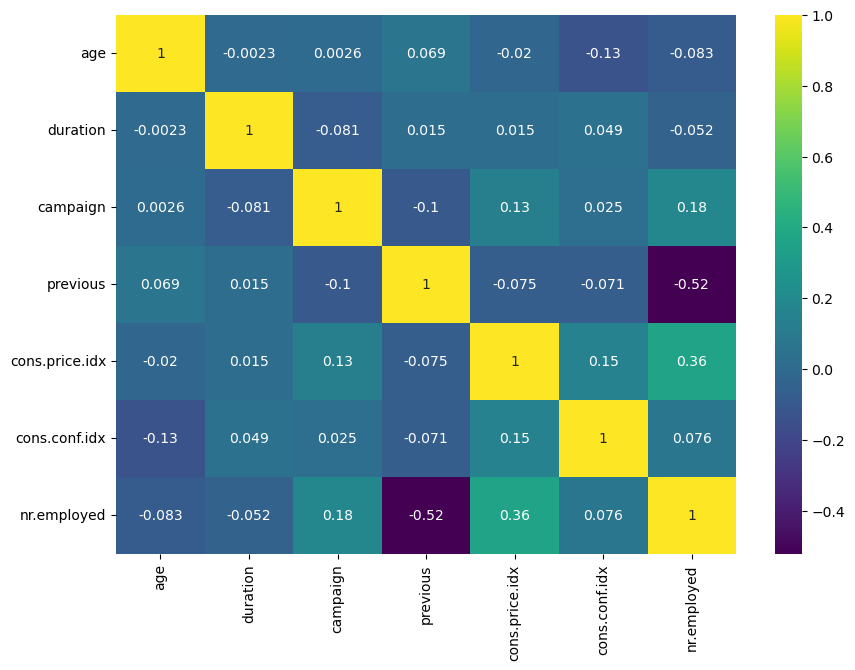

In [33]:
fig = plt.figure(figsize=(10,7))
x_data_corr = x.corr()
sns.heatmap(x_data_corr,annot=True, cmap="viridis")
plt.show()

[0.14061466 0.46271054 0.05177623 0.03206979 0.06096773 0.07410602
 0.17775503]


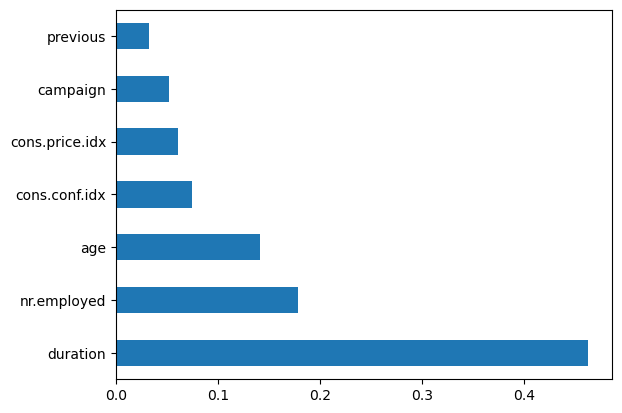

In [36]:
num_columns = df.select_dtypes(exclude='object').columns.tolist()
X = x  #independent columns
y = df['y']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)              
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [37]:
df

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0      32     205.0         2    999         0           1.1          93.994   
1      32     556.5        10    999         0           1.4          93.918   
2      45      45.0         8    999         0           1.4          93.444   
3      33     400.0         1      5         2          -1.1          94.601   
4      47     556.5         2    999         1          -1.8          93.075   
...   ...       ...       ...    ...       ...           ...             ...   
9635   37     556.5         3    999         0           1.4          94.465   
9636   40     353.0         2    999         0           1.4          93.918   
9637   42      86.0         1    999         1          -0.1          93.200   
9638   39     233.0         1    999         0           1.4          94.465   
9639   35     417.0         1    999         0           1.4          94.465   

      cons.conf.idx  euribor3m  nr.employed  y  
0              36.4      4.858       5191.0  1  
1              42.7      4.960       5228.1  0  
2              36.1      4.963       5228.1  1  
3              49.5      1.032       4963.6  0  
4              47.1      1.415       5099.1  0  
...             ...        ...          ... ..  
9635           41.8      4.961       5228.1  1  
9636           42.7      4.960       5228.1  1  
9637           42.0      4.191       5195.8  1  
9638           41.8      4.864       5228.1  1  
9639           41.8      4.962       5228.1  1  

[9640 rows x 11 columns]

In [38]:
X = df.drop("y",axis=1)
X

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0      32     205.0         2    999         0           1.1          93.994   
1      32     556.5        10    999         0           1.4          93.918   
2      45      45.0         8    999         0           1.4          93.444   
3      33     400.0         1      5         2          -1.1          94.601   
4      47     556.5         2    999         1          -1.8          93.075   
...   ...       ...       ...    ...       ...           ...             ...   
9635   37     556.5         3    999         0           1.4          94.465   
9636   40     353.0         2    999         0           1.4          93.918   
9637   42      86.0         1    999         1          -0.1          93.200   
9638   39     233.0         1    999         0           1.4          94.465   
9639   35     417.0         1    999         0           1.4          94.465   

      cons.conf.idx  euribor3m  nr.employed  
0              36.4      4.858       5191.0  
1              42.7      4.960       5228.1  
2              36.1      4.963       5228.1  
3              49.5      1.032       4963.6  
4              47.1      1.415       5099.1  
...             ...        ...          ...  
9635           41.8      4.961       5228.1  
9636           42.7      4.960       5228.1  
9637           42.0      4.191       5195.8  
9638           41.8      4.864       5228.1  
9639           41.8      4.962       5228.1  

[9640 rows x 10 columns]

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of all the numeric variables and find the value of skewness for each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
plt.rcParams['figure.figsize'] = [15,8]

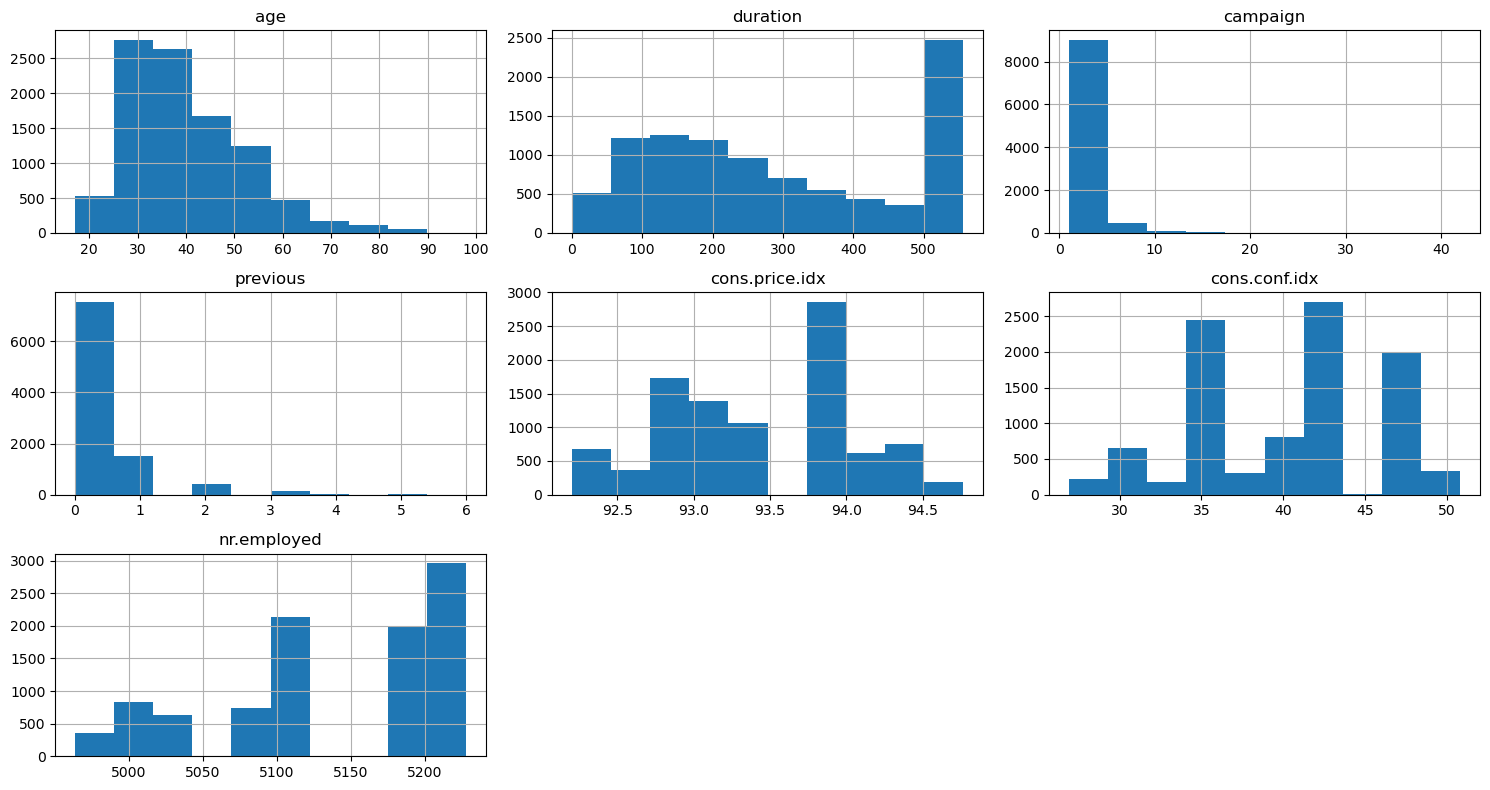

In [41]:
x.hist()
plt.tight_layout()
plt.show() 

In [42]:
x.skew()

age               0.990535
duration          0.238453
campaign          5.098841
previous          2.895599
cons.price.idx   -0.125216
cons.conf.idx    -0.350442
nr.employed      -0.463581
dtype: float64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Text(0.5, 1.0, 'Frequency distribution of subscribed customer')

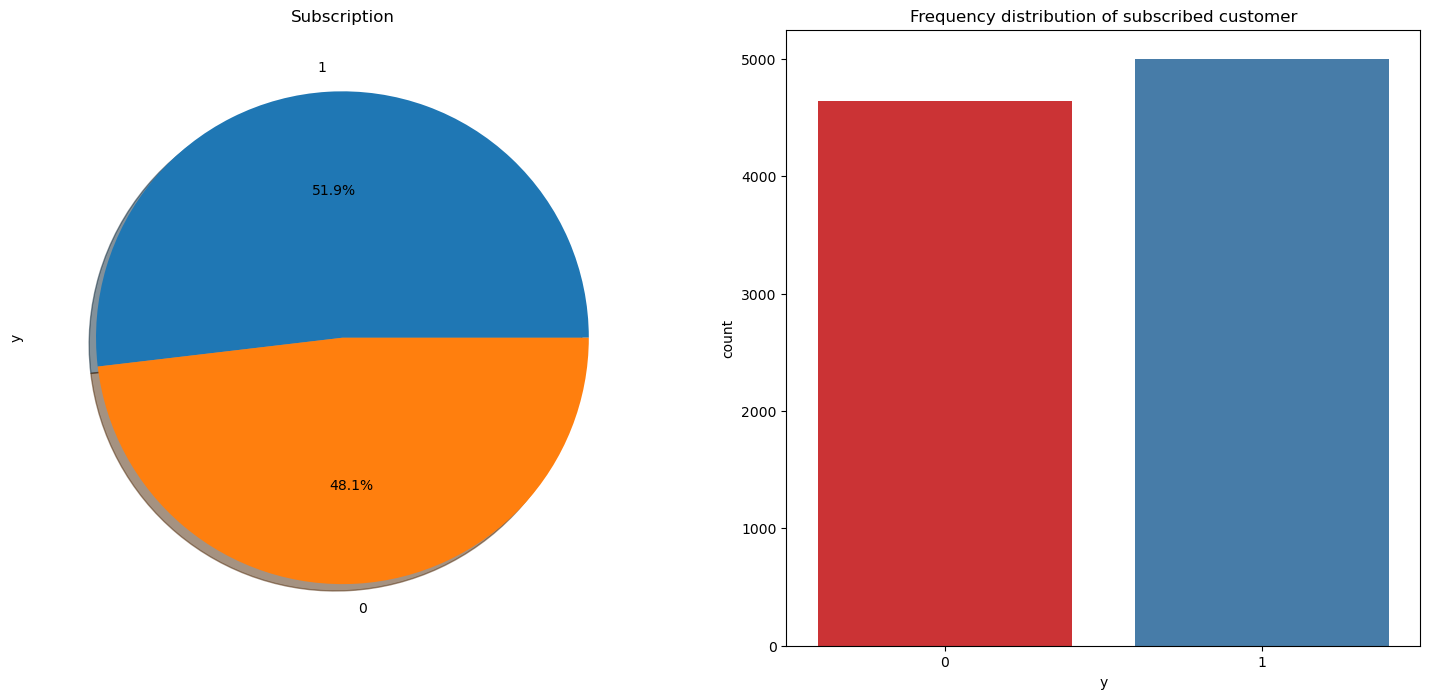

In [44]:
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0] = df['y'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Subscription')

#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="y", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of subscribed customer")


In [45]:
y_no = y[y == 0]
y_yes = y[y == 1]
len(y_no), len(y_yes)

(4640, 5000)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The Dataset is Balanced and evenly distributed and does not need oversampling or under sampling </b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [46]:
x.head()

age  duration  campaign  previous  cons.price.idx  cons.conf.idx  \
0   32     205.0         2         0          93.994           36.4   
1   32     556.5        10         0          93.918           42.7   
2   45      45.0         8         0          93.444           36.1   
3   33     400.0         1         2          94.601           49.5   
4   47     556.5         2         1          93.075           47.1   

   nr.employed  
0       5191.0  
1       5228.1  
2       5228.1  
3       4963.6  
4       5099.1

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
sc = StandardScaler()
scaled_data = sc.fit_transform(x)
x_scaled_data = pd.DataFrame(scaled_data, columns=x.columns)

In [48]:
x_scaled_data.head()

age  duration  campaign  previous  cons.price.idx  cons.conf.idx  \
0 -0.696316 -0.521065 -0.146440 -0.447172        0.805042      -0.726230   
1 -0.696316  1.410370  3.208708 -0.447172        0.684662       0.457420   
2  0.396061 -1.400238  2.369921 -0.447172       -0.066130      -0.782594   
3 -0.612287  0.550428 -0.565833  2.474374        1.766500       1.735011   
4  0.564119  1.410370 -0.146440  1.013601       -0.650607       1.284096   

   nr.employed  
0     0.620697  
1     1.050379  
2     1.050379  
3    -2.012985  
4    -0.443662

In [49]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled_data,y,test_size=0.3,stratify=y,random_state = 10)

In [50]:
xtrain.shape, xtest.shape

((6748, 7), (2892, 7))

In [51]:
ytrain.shape, ytest.shape

((6748,), (2892,))

In [52]:
# To store results of models
result_dict_train = {}
result_dict_test = {}

#### Create a generalized function to calculate the metrics for the train and the test set.

In [53]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(xtrain)

    # return the performace measures on train set
    return(classification_report(ytrain, train_pred))

In [54]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(xtest)

    # return the performace measures on test set
    return(classification_report(ytest, test_pred))

<a id="logreg"> </a>
## 2. Logistic regression model

In [55]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
reg_log = sm.Logit(ytrain,xtrain)
results_log = reg_log.fit()

# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.362334
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6748
Model:                          Logit   Df Residuals:                     6741
Method:                           MLE   Df Model:                            6
Date:                Tue, 20 Jun 2023   Pseudo R-squ.:                  0.4767
Time:                        21:47:10   Log-Likelihood:                -2445.0
converged:                       True   LL-Null:                       -4672.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0384      0.037     -1.047      0.295      -0.110       0.033
duration          -1.9163      0.048    -39.994      0.000      -2.010      -1.822
campaign           0.0112      0.046      0.244      0.807      -0.079       0.101
previous          -0.1998      0.048     -4.126      0.000      -0.295      -0.105
cons.price.idx     0.2131      0.042      5.043      0.000       0.130       0.296
cons.conf.idx      0.1991      0.036      5.509      0.000       0.128       0.270
nr.employed        1.4893      0.055     26.942      0.000       1.381       1.598
==================================================================================
"""

In [56]:
logistic_model = LogisticRegression()
logistic_model.fit(xtrain,ytrain)

LogisticRegression()

In [57]:
ytrain_pred = logistic_model.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain_pred,ytrain)
print("Training Data Accurracy:",round(training_data_accuracy,2)*100)

ytest_pred = logistic_model.predict(xtest)
testing_data_accuracy = accuracy_score(ytest_pred,ytest)
print("Testing Data Accurracy:",round(testing_data_accuracy,2)*100)

Training Data Accurracy: 85.0
Testing Data Accurracy: 84.0


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How does a unit change in each feature influence the odds of a client subscribed a term deposit or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
np.exp(results_log.params.sort_values(ascending=False))

nr.employed       4.433813
cons.price.idx    1.237483
cons.conf.idx     1.220314
campaign          1.011235
age               0.962348
previous          0.818914
duration          0.147158
dtype: float64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal threshold</b>
                </font>
            </div>
        </td>
    </tr>
</table> 

In [78]:
y_pred_test = logistic_model.predict(xtest)

fpr, tpr, thresholds = roc_curve(ytest,y_pred_test)
youden = pd.DataFrame({'TPR':TP,'FPR':FP,'Threshold':thresholds})
youden['Difference'] = youden['TPR'] - youden['FPR']
youden = youden.sort_values('Difference',ascending=False)
youden.head()

TPR  FPR  Threshold  Difference
0  1225  182          2        1043
1  1225  182          1        1043
2  1225  182          0        1043

In [79]:
y_pred_youden = [0 if i<0.38 else 1 for i in y_pred_test]

In [80]:
cm = confusion_matrix(ytest,y_pred_youden)
conf_mat = pd.DataFrame(cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
conf_mat

Predicted:0  Predicted:1
Actual:0         1210          182
Actual:1          275         1225

In [81]:
eval_table = classification_report(ytest,y_pred_youden)
print(eval_table)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1392
           1       0.87      0.82      0.84      1500

    accuracy                           0.84      2892
   macro avg       0.84      0.84      0.84      2892
weighted avg       0.84      0.84      0.84      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
xtest.head()

age  duration  campaign  previous  cons.price.idx  cons.conf.idx  \
1523  0.312032 -0.471611 -0.146440 -0.447172       -0.452614       0.325903   
7823 -1.284519 -0.658435 -0.565833 -0.447172        0.901663      -0.087435   
3709 -0.108113 -0.707889 -0.565833 -0.447172        0.494588       0.025294   
3827  0.059945 -0.543044 -0.565833 -0.447172        1.551083       0.288327   
7401  0.984263  1.410370 -0.565833 -0.447172       -0.066130      -0.782594   

      nr.employed  
1523     0.676289  
7823    -1.688697  
3709     0.676289  
3827     1.050379  
7401     1.050379

In [61]:
df1 = pd.DataFrame(ytrain_pred)

In [62]:
df1.value_counts()

0    3472
1    3276
dtype: int64

In [63]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [0 if x < 0.5 else 1 for x in ytest_pred]

In [64]:
# print the first five observations of y_pred_rfe
y_pred[0:5]

[1, 0, 1, 1, 0]

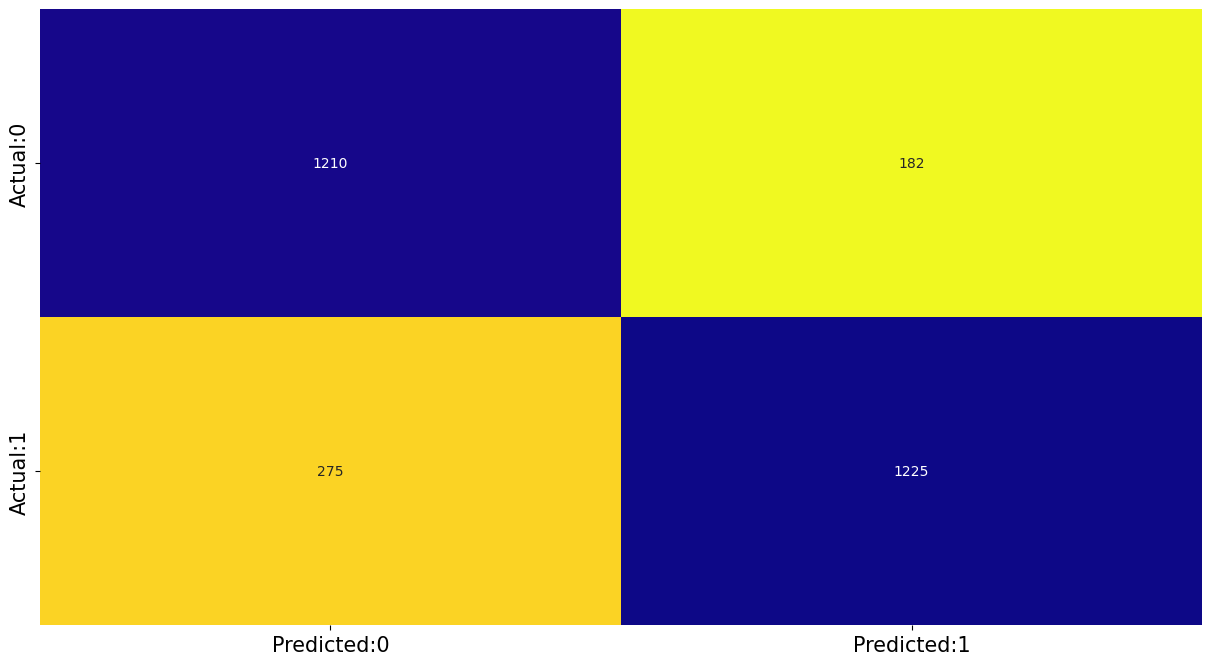

In [66]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(ytest, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False,cmap='plasma_r')

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 15)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 15)

# display the plot
plt.show()

In [67]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

print("True Positive: ",TP)
print("False Positive: ",FP)
print("True Negative: ",TN)
print("False Negative: ",FN)

True Positive:  1225
False Positive:  182
True Negative:  1210
False Negative:  275


**Accuracy:** It is the ratio of correct predictions (i.e. TN+TP) to the total observations. According to the confusion matrix, it is the ratio of the sum of diagonal elements to the sum of all the in the matrix. It is not a very good measure if the dataset is imbalanced.

In [68]:
# calculate the Accuracy value
accuracy = (TP+TN)/(TP+TN+FP+FN)

print("Accuracy: ",accuracy)

Accuracy:  0.8419778699861687


In [69]:
# calculate various performance measures
acc_table = classification_report(ytest, y_pred)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1392
           1       0.87      0.82      0.84      1500

    accuracy                           0.84      2892
   macro avg       0.84      0.84      0.84      2892
weighted avg       0.84      0.84      0.84      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate value of kappa for the full model . Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [71]:
# convert probabilities to 0 and 1 using 'if_else'
y_kpred = [ 0 if x < 0.18 else 1 for x in ytest_pred]

In [72]:
# print the first five observations of y_pred_rfe
y_kpred[0:5]

[1, 0, 1, 1, 0]

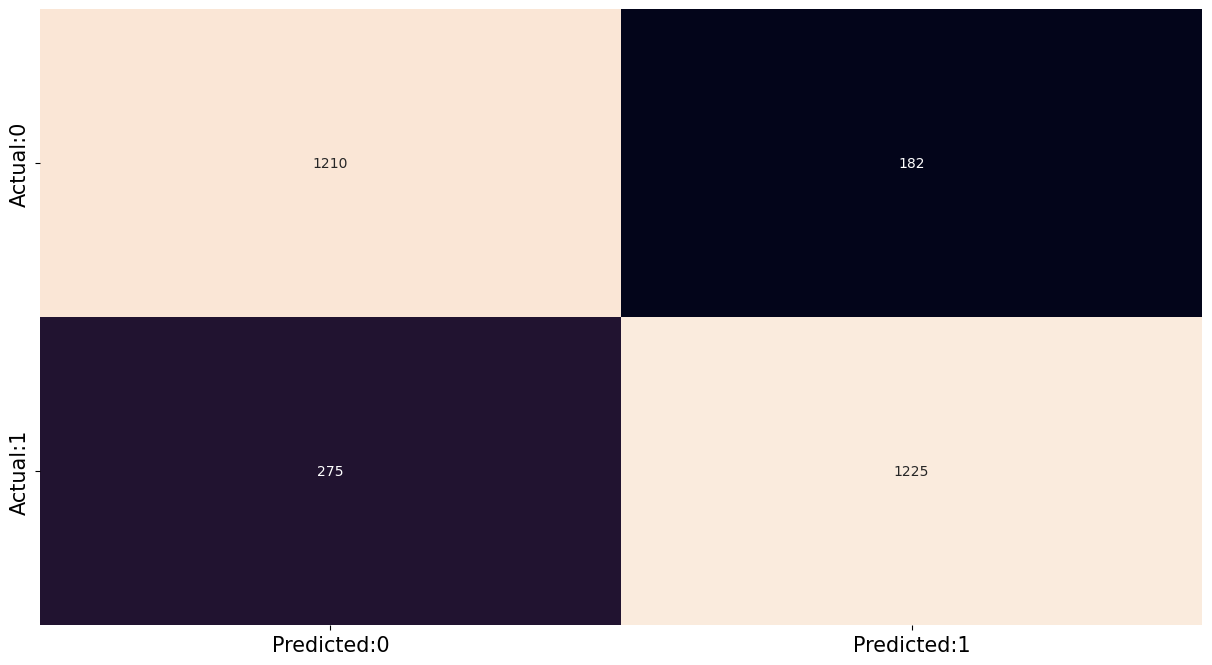

In [73]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(ytest, y_kpred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False)

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 15)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 15)

# display the plot
plt.show()

In [74]:
# compute the kappa value
kappa = cohen_kappa_score(ytest, y_kpred)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6842737438975797


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate the cross entropy for the logistic regression model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Predict whether a client subscribed a term deposit or not. For the logistic regression model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 3.Build a Decision Tree model and generate a classification report.



In [90]:
dt_classification = DecisionTreeClassifier(random_state = 10)
dt_accuracy = cross_val_score(dt_classification, xtrain, ytrain, cv=5)

# fit the model using fit() on train data
dt_model = dt_classification.fit(xtrain, ytrain)

print("DT model Train Score:",np.mean(dt_accuracy)*100)
print("DT model Test Score:",dt_classification.score(xtest,ytest)*100)

DT model Train Score: 82.58737610850288
DT model Test Score: 82.60719225449516


In [92]:
# save the column names in 'labels'
labels = xtrain.columns

# export a decision tree in DOT format
# pass the 'decision_tree' to export it to Graphviz
# pass the column names to 'feature_names'
# pass the required class labels to 'class_names'
dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["0","1"])  

# plot the decision tree using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.619075 to fit

(process:17720): GLib-GIO-WARNING **: 22:14:13.219: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:17720): GLib-GIO-WARNING **: 22:14:13.235: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [97]:
# create a dictionary with hyperparameters and its values
tuned_paramaters = {"splitter":["best","random"],
                    'criterion': ["gini", "entropy"],
                    "max_depth" : [10,15,20],
                    "min_samples_leaf":[5, 10, 15, 20, 25, 30, 40],
                    "max_features":["log2","sqrt"] }

In [98]:
# use GridSearchCV() to find the optimal value for the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold (i.e) here cv=5
dt_grid = GridSearchCV(estimator = dt_classification, param_grid=tuned_paramaters, cv=5)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid.fit(xtrain,ytrain)

In [99]:
# get the best parameters and score
print("Best parameters for Random Forest Classifier:\n", dt_grid_model.best_params_, "\n")
print('Best Score:',dt_grid_model.best_score_*100)

Best parameters for Random Forest Classifier:
 {'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 10, 'splitter': 'best'} 

Best Score: 87.61133349806443


In [100]:
dt_opt_model = DecisionTreeClassifier(criterion = dt_grid_model.best_params_.get("criterion"),
                                 max_depth = dt_grid_model.best_params_.get("max_depth"),
                                 max_leaf_nodes = dt_grid_model.best_params_.get("max_leaf_nodes"),
                                 min_samples_leaf = dt_grid_model.best_params_.get("min_samples_leaf"),
                                 splitter = dt_grid_model.best_params_.get("splitter"),
                                 random_state = 10)

dt_opt_model_accuracy = cross_val_score(dt_opt_model,x,y,cv=5)
dt_opt_model = dt_opt_model.fit(xtrain,ytrain)

# testing the model
dt_opt_ypred = dt_opt_model.predict(xtest)

# printing the accuracy of the model
print(accuracy_score(dt_opt_ypred, ytest))

# print("DT Optimal model Train Score:",np.mean(dt_opt_model_accuracy)*100)
# print("DT Optimal model Test Score:",dt_opt_model.score(xtest,ytest)*100)

0.8706777316735823


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [101]:
print(classification_report(ytest, dt_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1392
           1       0.84      0.82      0.83      1500

    accuracy                           0.83      2892
   macro avg       0.83      0.83      0.83      2892
weighted avg       0.83      0.83      0.83      2892



In [102]:
print(classification_report(ytest, dt_opt_model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1392
           1       0.91      0.83      0.87      1500

    accuracy                           0.87      2892
   macro avg       0.87      0.87      0.87      2892
weighted avg       0.87      0.87      0.87      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>On Comparison of Optimized and non optimized decesion tree we can find that the optimized decesion tree has better performance matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 4.Build a Random Forest model with n_estimators=30 and generate a classification report.



In [103]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 30, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(xtrain, ytrain)

**Calculate performance measures on the train set.**

In [104]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3248
           1       0.99      0.97      0.98      3500

    accuracy                           0.98      6748
   macro avg       0.98      0.98      0.98      6748
weighted avg       0.98      0.98      0.98      6748



**Calculate performance measures on the test set.**

In [105]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1392
           1       0.89      0.83      0.86      1500

    accuracy                           0.86      2892
   macro avg       0.86      0.86      0.86      2892
weighted avg       0.86      0.86      0.86      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [108]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2']}]

In [109]:
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)
    
# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, param_grid = tuned_paramaters, cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(xtrain, ytrain)

In [110]:
# get the best parameters and score
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')
print('Best Score for random forest classifier:',rf_grid_model.best_score_*100)

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30} 

Best Score for random forest classifier: 88.14462290311067


#### Build the model using the tuned hyperparameters.

In [111]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_opt_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_opt_model = rf_opt_model.fit(xtrain, ytrain)

# testing the model
rf_opt_ypred = rf_opt_model.predict(xtest)

# printing the accuracy of the model
print(accuracy_score(rf_opt_ypred, ytest))

0.8793222683264177


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [112]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1392
           1       0.89      0.83      0.86      1500

    accuracy                           0.86      2892
   macro avg       0.86      0.86      0.86      2892
weighted avg       0.86      0.86      0.86      2892



In [113]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Classification Report for test set: \n', get_test_report(rf_opt_model))

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1392
           1       0.93      0.83      0.88      1500

    accuracy                           0.88      2892
   macro avg       0.88      0.88      0.88      2892
weighted avg       0.88      0.88      0.88      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>On Comparison of Optimized and non optimized Random forest model we can find that the optimized decesion tree has better performance matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 5.Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix

In [115]:
import xgboost as xgb
from xgboost import XGBRegressor
# instantiate the 'XGBClassifier'
# pass the required number of learning rate to the parameter, 'learning_rate'
# pass the required number of gamme to the parameter, 'gamma'
# pass the 'random_state' to obtain the same samples for each time you run the code
xgb_classification = xgb.XGBClassifier(learning_rate=0.4, gamma=3, random_state = 10)

# use fit() to fit the model on the train set
xgb_model = xgb_classification.fit(xtrain, ytrain)

Accuracy: 87.96680497925311


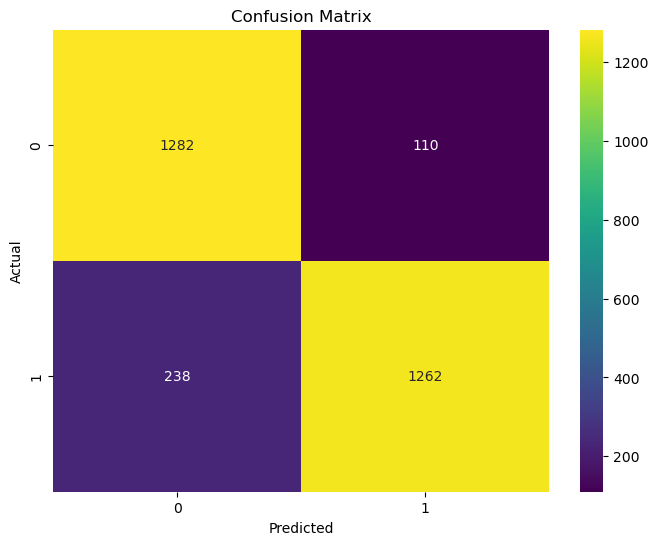

In [116]:
ypred = xgb_model.predict(xtest)

# Create the confusion matrix
cm = confusion_matrix(ytest, ypred)

# Calculate the accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy*100)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [117]:
# print the performance measures for train set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('XGB Classifier Report for train set: \n', get_train_report(xgb_model))

XGB Classifier Report for train set: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      3248
           1       0.94      0.87      0.90      3500

    accuracy                           0.90      6748
   macro avg       0.90      0.90      0.90      6748
weighted avg       0.91      0.90      0.90      6748



In [118]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('XGB Classifier Report for test set: \n', get_test_report(xgb_model))

XGB Classifier Report for test set: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1392
           1       0.92      0.84      0.88      1500

    accuracy                           0.88      2892
   macro avg       0.88      0.88      0.88      2892
weighted avg       0.88      0.88      0.88      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
# create a dictionary with hyperparameters and its values
# pass a list of values to 'max_depth' that assigns maximum depth of the tree

tuned_paramaters = [{
                    'n_estimators': [10, 30, 50],
                    'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9],
                    'max_depth': [10, 15, 20],
                    'gamma': [0, 1, 2, 3, 4, 5]
                    }]

In [120]:
# instantiate the 'XGB Classifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
xgb_classification = xgb.XGBClassifier(random_state = 10)
    
# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGB Classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
xgb_grid = GridSearchCV(estimator = xgb_classification, param_grid = tuned_paramaters, cv = 5)

# use fit() to fit the model on the train set
xgb_grid_model = xgb_grid.fit(xtrain, ytrain)

In [ ]:
# get the best parameters and score
print('Best parameters for xbg classifier: ', xgb_grid_model.best_params_)
print('Best Score for xgb classifier:',xgb_grid_model.best_score_*100)
xgb_grid_model.best_score_

#### Build the model using the tuned hyperparameters.

In [121]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
xgb_opt_model =  xgb.XGBClassifier(gamma = rf_grid_model.best_params_.get('gamma'), 
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  learning_rate = rf_grid_model.best_params_.get('learning_rate'),
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  random_state = 10)

# use fit() to fit the model on the train set
xgb_opt_model = xgb_opt_model.fit(xtrain, ytrain)


# testing the model
xgb_opt_ypred = xgb_opt_model.predict(xtest)

# printing the accuracy of the model
print(accuracy_score(xgb_opt_ypred, ytest))

0.8668741355463347


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [122]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('XGB Classification Report for test set: \n\n', get_test_report(xgb_model))

XGB Classification Report for test set: 

               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1392
           1       0.92      0.84      0.88      1500

    accuracy                           0.88      2892
   macro avg       0.88      0.88      0.88      2892
weighted avg       0.88      0.88      0.88      2892



In [123]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Optmized XGB Classification Report for test set: \n\n', get_test_report(xgb_opt_model))

Optmized XGB Classification Report for test set: 

               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1392
           1       0.90      0.83      0.87      1500

    accuracy                           0.87      2892
   macro avg       0.87      0.87      0.87      2892
weighted avg       0.87      0.87      0.87      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>On Comparison of Optimized and non optimized XG boost has very similar performance matrix so we can say that the hyperparameters are bringing more cross entropy in the dataset</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 6.Build the K - Nearest Neighbor Model

In [124]:
knn_classification = KNeighborsClassifier(n_neighbors=1)

# use fit() to fit the model on the train set
knn_model = knn_classification.fit(xtrain, ytrain)

In [125]:
# testing the model
ypred= knn_model.predict(xtest)

# printing accuracy
print(accuracy_score(ytest,ypred))

0.8156984785615491


**Calculate performance measures on the train set.**

In [126]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(knn_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3248
           1       0.98      0.98      0.98      3500

    accuracy                           0.98      6748
   macro avg       0.98      0.98      0.98      6748
weighted avg       0.98      0.98      0.98      6748



**Calculate performance measures on the test set.**

In [127]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1392
           1       0.83      0.82      0.82      1500

    accuracy                           0.82      2892
   macro avg       0.82      0.82      0.82      2892
weighted avg       0.82      0.82      0.82      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal K-Value using Elbow Curve Method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [128]:
accuracy_scores = []
k_values = list(range(1, 50))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    accuracy = knn.score(xtest, ytest)
    accuracy_scores.append(accuracy)

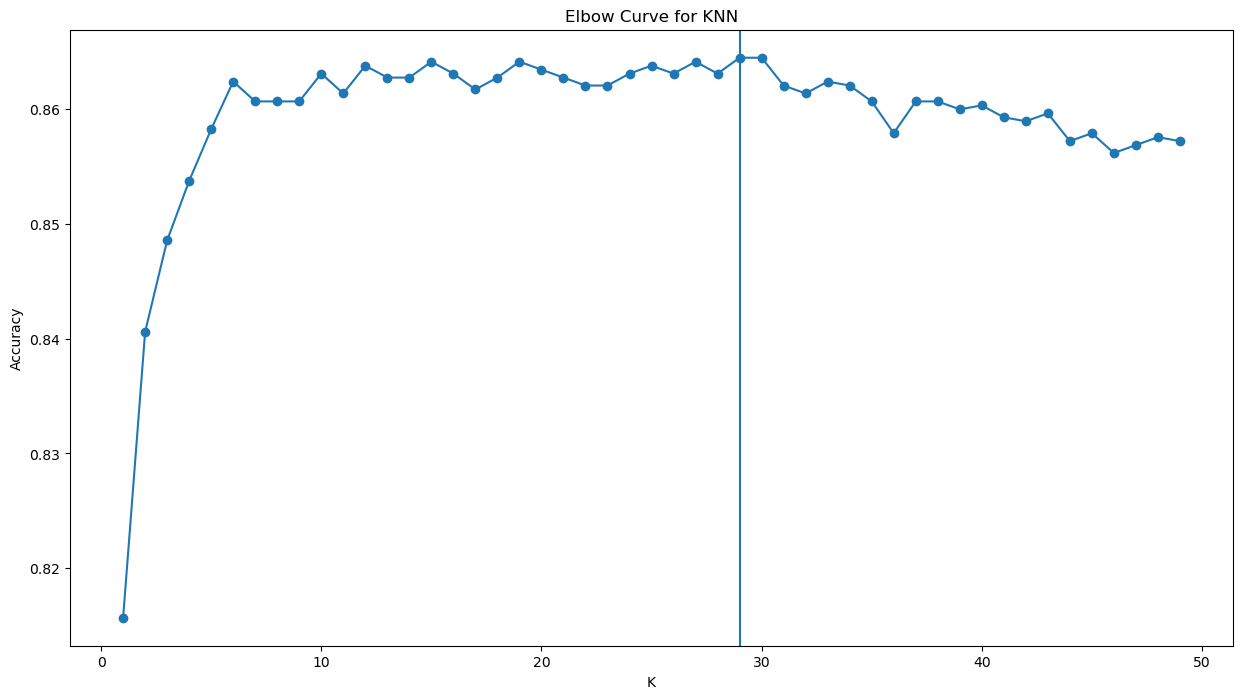

In [129]:
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.axvline(29)
plt.title('Elbow Curve for KNN')
plt.show()

In [130]:
neighbors = range(1,50)

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    # predict the response
    ypred = knn.predict(xtest)
    # evaluate accuracy
    scores = accuracy_score(ytest, ypred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 29


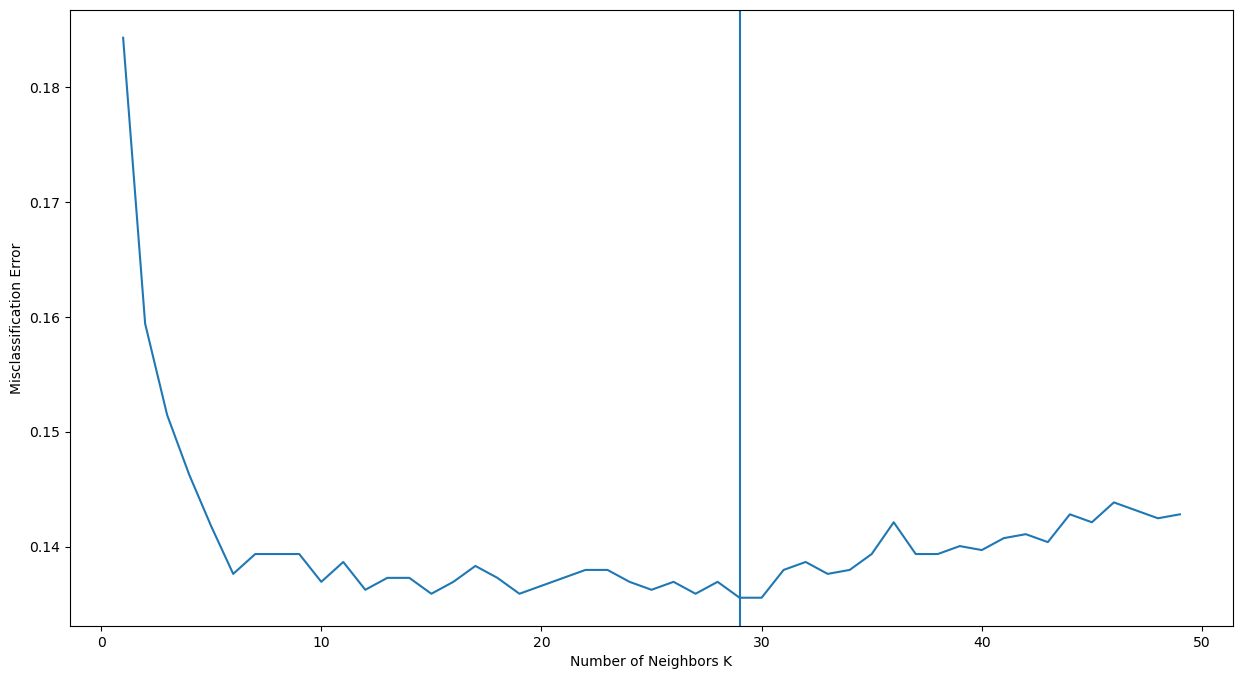

In [131]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.axvline(29)
plt.show()

#### Thus from the Elbow curve and MSE plots, we can see that the optimal k-value is 29.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
knn_opt_classification = KNeighborsClassifier(n_neighbors=29)

# use fit() to fit the model on the train set
knn_opt_model = knn_opt_classification.fit(xtrain, ytrain)

In [133]:
# testing the model
knn_opt_ypred= knn_opt_model.predict(xtest)

# printing accuracy
print(accuracy_score(knn_opt_ypred,ytest))

0.8644536652835408


**Calculate performance measures on the test set.**

In [134]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('KNN Classification Report for test set: \n\n', get_test_report(knn_model))

KNN Classification Report for test set: 

               precision    recall  f1-score   support

           0       0.80      0.82      0.81      1392
           1       0.83      0.82      0.82      1500

    accuracy                           0.82      2892
   macro avg       0.82      0.82      0.82      2892
weighted avg       0.82      0.82      0.82      2892



In [135]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('Optmized KNN Classification Report for test set: \n\n', get_test_report(knn_opt_model))

Optmized KNN Classification Report for test set: 

               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1392
           1       0.91      0.82      0.86      1500

    accuracy                           0.86      2892
   macro avg       0.87      0.87      0.86      2892
weighted avg       0.87      0.86      0.86      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>On Comparison of Optimized and non optimized K Nearest Neighbour model we can  find that the optimized decesion tree has better performance matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 7. Build the Naive Bayes Model

In [136]:
# import Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# create a Gaussian Classifier
gnb_classification = GaussianNB()

# training the model
gnb_model = gnb_classification.fit(xtrain, ytrain)

# testing the model
gnb_ypred = gnb_model.predict(xtest)

# printing the accuracy of the model
print(accuracy_score(gnb_ypred, ytest))

0.7845781466113416


In [137]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('GaussianNB Classification Report for test set: \n\n', get_test_report(gnb_model))

GaussianNB Classification Report for test set: 

               precision    recall  f1-score   support

           0       0.78      0.77      0.78      1392
           1       0.79      0.80      0.79      1500

    accuracy                           0.78      2892
   macro avg       0.78      0.78      0.78      2892
weighted avg       0.78      0.78      0.78      2892



In [138]:
# import Gaussian Bernoulli Bayes classifier
from sklearn.naive_bayes import BernoulliNB

# create a BernoulliNB Classifier
bnb_classification = BernoulliNB()

# training the model
bnb_model = bnb_classification.fit(xtrain, ytrain)

# testing the model
bnb_ypred = bnb_model.predict(xtest)

# printing the accuracy of the model
print(accuracy_score(ypred, ytest))

0.857192254495159


In [139]:
# print the performance measures for test set for the model with best parameters
# call the function 'get_test_report'
# pass the decision tree using GridSearch to the function
print('BernoulliNB Classification Report for test set: \n\n', get_test_report(bnb_model))

BernoulliNB Classification Report for test set: 

               precision    recall  f1-score   support

           0       0.76      0.67      0.71      1392
           1       0.72      0.80      0.76      1500

    accuracy                           0.74      2892
   macro avg       0.74      0.73      0.73      2892
weighted avg       0.74      0.74      0.74      2892



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the classification results of Gaussian, Bernoulli and Multinomial Naive Bayes</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>On Comparison of Gaussian and Bernoulli Naive Bays we can find that the Gaussian Naive Bays has better performance matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 8. Compare the results of all above mentioned algorithms 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using model performance evaluation metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [144]:
dict = {'Classifier':['Decision Tree', 'Random Forest Tree'],
        'Accuracy':[np.round(accuracy_score(ytest, dt_opt_ypred),4)*100, np.round(accuracy_score(ytest, rf_opt_ypred),4)*100],
        'Precision':[np.round(precision_score(ytest, dt_opt_ypred),4)*100, np.round(precision_score(ytest, rf_opt_ypred),4)*100],
        'Recall':[np.round(recall_score(ytest, dt_opt_ypred),4)*100, np.round(recall_score(ytest, rf_opt_ypred),4)*100],
        'F1-Score':[np.round(f1_score(ytest, dt_opt_ypred),4)*100, np.round(f1_score(ytest, rf_opt_ypred),4)*100],
        'ROC AUC Score':[np.round(roc_auc_score(ytest, dt_opt_ypred),4)*100, np.round(roc_auc_score(ytest, rf_opt_ypred),4)*100],
       }

ComparePerformanceMetrics = pd.DataFrame(dict)
df1 = {'Classifier': 'Logistic Regression', 
       'Accuracy': np.round(accuracy_score(ytest, y_pred_youden),4)*100, 
       'Precision': np.round(precision_score(ytest, y_pred_youden),4)*100,
       'Recall': np.round(recall_score(ytest, y_pred_youden),4)*100, 
       'F1-Score': np.round(f1_score(ytest, y_pred_youden),4)*100,
       'ROC AUC Score':np.round(roc_auc_score(ytest, y_pred_youden),4)*100}
  
df2 = {'Classifier': 'K Nearest Neighbour', 
       'Accuracy': np.round(accuracy_score(ytest, knn_opt_ypred),4)*100, 
       'Precision': np.round(precision_score(ytest, knn_opt_ypred),4)*100,
       'Recall': np.round(recall_score(ytest, knn_opt_ypred),4)*100, 
       'F1-Score': np.round(f1_score(ytest, knn_opt_ypred),4)*100,
       'ROC AUC Score':np.round(roc_auc_score(ytest, knn_opt_ypred),4)*100}

df3 = {'Classifier': 'Extreme Gradient Boost', 
       'Accuracy': np.round(accuracy_score(ytest, xgb_opt_ypred),4)*100, 
       'Precision': np.round(precision_score(ytest, xgb_opt_ypred),4)*100,
       'Recall': np.round(recall_score(ytest, xgb_opt_ypred),4)*100, 
       'F1-Score': np.round(f1_score(ytest, xgb_opt_ypred),4)*100,
       'ROC AUC Score':np.round(roc_auc_score(ytest, xgb_opt_ypred),4)*100}

df4 = {'Classifier': 'Gaussian Naive Bayes', 
       'Accuracy': np.round(accuracy_score(ytest, gnb_ypred),4)*100, 
       'Precision': np.round(precision_score(ytest, gnb_ypred),4)*100,
       'Recall': np.round(recall_score(ytest, gnb_ypred),4)*100, 
       'F1-Score': np.round(f1_score(ytest, gnb_ypred),4)*100,
       'ROC AUC Score':np.round(roc_auc_score(ytest, gnb_ypred),4)*100}

df5 = {'Classifier': 'Bernoulli Naive Bayes', 
       'Accuracy': np.round(accuracy_score(ytest, bnb_ypred),4)*100, 
       'Precision': np.round(precision_score(ytest, bnb_ypred),4)*100,
       'Recall': np.round(recall_score(ytest, bnb_ypred),4)*100, 
       'F1-Score': np.round(f1_score(ytest, bnb_ypred),4)*100,
       'ROC AUC Score':np.round(roc_auc_score(ytest, bnb_ypred),4)*100}

ComparePerformanceMetrics = ComparePerformanceMetrics.append(df1, ignore_index = True)
ComparePerformanceMetrics = ComparePerformanceMetrics.append(df2, ignore_index = True)
ComparePerformanceMetrics = ComparePerformanceMetrics.append(df3, ignore_index = True)
ComparePerformanceMetrics = ComparePerformanceMetrics.append(df4, ignore_index = True)
ComparePerformanceMetrics = ComparePerformanceMetrics.append(df5, ignore_index = True)
  
ComparePerformanceMetrics.head(10)

Classifier  Accuracy  Precision  Recall  F1-Score  \
0           Decision Tree     87.07      91.03   83.27     86.98   
1      Random Forest Tree     87.93      92.72   83.27     87.74   
2     Logistic Regression     84.20      87.06   81.67     84.28   
3     K Nearest Neighbour     86.45      90.74   82.27     86.29   
4  Extreme Gradient Boost     86.69      90.37   83.20     86.64   
5    Gaussian Naive Bayes     78.46      78.94   79.73     79.34   
6   Bernoulli Naive Bayes     73.72      72.21   80.20     75.99   

   ROC AUC Score  
0          87.22  
1          88.11  
2          84.30  
3          86.61  
4          86.82  
5          78.41  
6          73.47

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using their ROC curves.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [147]:
# Make predictions
dt_opt_probs = dt_opt_model.predict_proba(xtest)[:, 1]
rf_opt_probs = rf_opt_model.predict_proba(xtest)[:, 1]
knn_opt_probs = knn_opt_model.predict_proba(xtest)[:, 1]
xgb_opt_probs = xgb_opt_model.predict_proba(xtest)[:, 1]
gnb_opt_probs = gnb_model.predict_proba(xtest)[:, 1]
bnb_opt_probs = bnb_model.predict_proba(xtest)[:, 1]
lr_opt_probs=logistic_model.predict_proba(xtest)[:, 1]

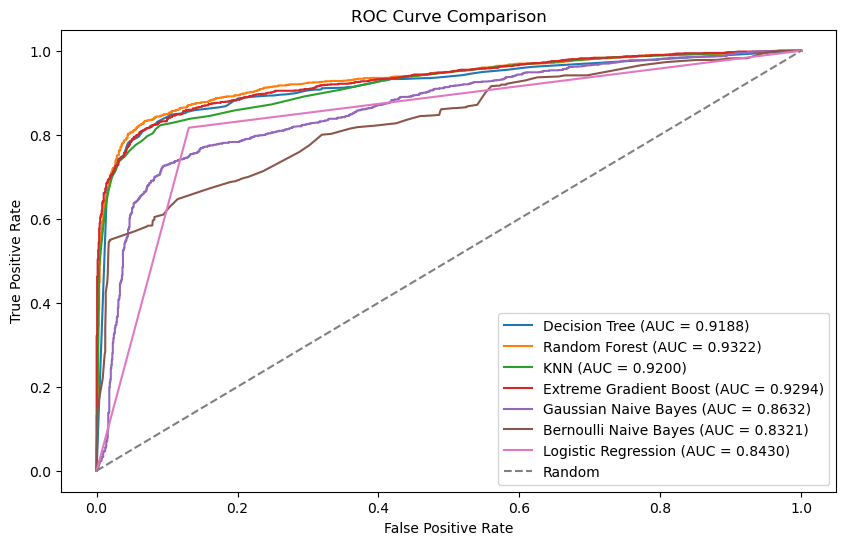

In [148]:
# Compute the false positive rate, true positive rate, and thresholds
dt_fpr, dt_tpr, dt_thresholds = roc_curve(ytest, dt_opt_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(ytest, rf_opt_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(ytest, knn_opt_probs)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(ytest, xgb_opt_probs)
gnb_fpr, gnb_tpr, gnb_thresholds = roc_curve(ytest, gnb_opt_probs)
bnb_fpr, bnb_tpr, bnb_thresholds = roc_curve(ytest, bnb_opt_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(ytest, lr_opt_probs)


# Compute the area under the ROC curve
dt_auc = auc(dt_fpr, dt_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
xgb_auc = auc(xgb_fpr, xgb_tpr)
knn_auc = auc(knn_fpr, knn_tpr)
gnb_auc = auc(gnb_fpr, gnb_tpr)
bnb_auc = auc(bnb_fpr, bnb_tpr)
lr_auc = auc(fpr,tpr)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.4f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.4f})")
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {knn_auc:.4f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"Extreme Gradient Boost (AUC = {xgb_auc:.4f})")
plt.plot(gnb_fpr, gnb_tpr, label=f"Gaussian Naive Bayes (AUC = {gnb_auc:.4f})")
plt.plot(bnb_fpr, bnb_tpr, label=f"Bernoulli Naive Bayes (AUC = {bnb_auc:.4f})")
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {lr_auc:.4f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above graph we can see that Random forest,Decesion tree and Extreme Gradient boost are good methods to classify the given dataset
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compute cross entropy and Compare all the classification models.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Cross-entropy is a commonly used loss function in machine learning, particularly in classification tasks. The goal is to minimize the cross-entropy loss, which leads to better model performance.

In [150]:
# Calculate the cross-entropy loss
dt_loss = log_loss(ytest, dt_opt_probs)
rf_loss = log_loss(ytest, rf_opt_probs)
knn_loss = log_loss(ytest, knn_opt_probs)
xgb_loss = log_loss(ytest, xgb_opt_probs)
gnb_loss = log_loss(ytest, gnb_opt_probs)
bnb_loss = log_loss(ytest, bnb_opt_probs)
lr_loss = log_loss(ytest,lr_opt_probs)

# Print the cross-entropy loss for each model
print(f"Decision Tree Cross-Entropy Loss: {dt_loss:.4f}")
print(f"Random Forest Cross-Entropy Loss: {rf_loss:.4f}")
print(f"KNN Cross-Entropy Loss: {knn_loss:.4f}")
print(f"Extreme Gradient Boost: {xgb_loss:.4f}")
print(f"Gaussian Naive Bayes: {gnb_loss:.4f}")
print(f"Bernoulli Naive Bayes: {bnb_loss:.4f}")
print(f"Logistic Regression: {lr_loss:.4f}")

Decision Tree Cross-Entropy Loss: 1.1580
Random Forest Cross-Entropy Loss: 0.3133
KNN Cross-Entropy Loss: 0.4186
Extreme Gradient Boost: 0.3273
Gaussian Naive Bayes: 0.6468
Bernoulli Naive Bayes: 0.5042
Logistic Regression: 0.3874


## 9. Intrepret your solution based on the results

### Random forest classifier is the best model for classifying the dataset as it has lowest log loss (Cross-entropy loss increases as the predicted probability diverges from the actual label.) And has best performance scores with and without optimization

### XG boost also performs well under the given dataset although log loss or the cross entropy loss is bit higher than the Random forest classifier.The AUC score and model performance are also on par with the Random forest classifier

### Though the Decesion tree has good ROC-Auc score and performance score the log loss is quite high stating that there are high chances of misclassification.